In [1]:
# !pip install textblob

# !pip install spacy
# !python -m textblob.download_corpora
# !python -m spacy download en_core_web_sm

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

In [3]:
#Read data from Company_Tweet.csv
Company_Tweet_df = pd.read_csv(Path("Resources/Company_Tweet.csv"))
Company_Tweet_df = Company_Tweet_df.set_index('tweet_id')
Company_Tweet_df.sample()

,ticker_symbol
tweet_id,
709761865379934210,AMZN


In [4]:
#Read data from Tweet.csv
tweet_df = pd.read_csv(Path("Resources/Tweet.csv"))
tweet_df = tweet_df.set_index('tweet_id')
tweet_df.sample()

,writer,post_date,body,comment_num,retweet_num,like_num
tweet_id,,,,,,
1143948385197658113,craigbuj,1561573523,"""A Video Superstar is Born"" #TikTok #ByteDanc...",0,0,1


In [5]:
#merge to df into one
Company_tweet_result = tweet_df.merge(Company_Tweet_df, left_index=True, right_index=True)

In [6]:
#select relavent ticker and column.
selected_df = Company_tweet_result[Company_tweet_result['ticker_symbol'].isin(['AAPL', 'TSLA', 'AMZN'])]
selected_df = selected_df[['ticker_symbol', 'post_date','body']]
selected_df.sample()

,ticker_symbol,post_date,body
tweet_id,,,
967168575227166721,TSLA,1519425932,"Yes, that was just the capital costs. I think ..."


In [7]:
# define Start date & end date to use for boolean indexing to filter the rows
start_date = '2019-01-01 00:00:00'
end_date = '2021-12-31 23:59:59'

In [8]:
#convert date into standard format
selected_df['post_date'] = pd.to_datetime(selected_df['post_date'], unit='s')

#filter the data based on post date ranging between start and end date
#rename columns to date, hashtags, text to make the dataframe consistent for concatenation
stock_tweet_df = selected_df[(selected_df['post_date'] >= start_date) & (selected_df['post_date'] <= end_date)]
stock_tweet_df = stock_tweet_df[['ticker_symbol', 'post_date', 'body']]
stock_tweet_df.columns = ['hashtags', 'date', 'text']
stock_tweet_df = stock_tweet_df #.set_index('date')
stock_tweet_df.dropna(inplace = True)
stock_tweet_df.head()

,hashtags,date,text
tweet_id,,,
1079890068867817473,TSLA,2019-01-01 00:00:30,!! 8 Hours Left !!The picture you see here is...
1079890718326431745,TSLA,2019-01-01 00:03:05,$3750 would be the minimum discount in any cas...
1079890782742503424,TSLA,2019-01-01 00:03:20,There are FUDking analysts like those from gol...
1079891097965322240,TSLA,2019-01-01 00:04:35,I really hope they report ‘unbelievable’ numbe...
1079891844807430144,TSLA,2019-01-01 00:07:33,#TESLA : $TSLA Dec-31 Update #StockMarket #Tec...


In [81]:
# Read data from Ethereum_tweets.csv 
ethereum_tweets = pd.read_csv(
    Path("Resources/Ethereum_tweets.csv",
    #index_col='date', 
    parse_dates=True, 
    infer_datetime_format=True
)).dropna()
ethereum_tweets.drop_duplicates(subset=['text'], keep = 'first', inplace = True)
ethereum_tweets['hashtags'] = 'ETH'
ethereum_tweets = ethereum_tweets[["date", "hashtags", "text"]]
ethereum_tweets.head(5)

,date,hashtags,text
1,11/15/2021 7:26:35,ETH,"Adopted a Hypocat #053, “Crazy Rich Cat” 🤑💵💵💵🤩..."
7,11/15/2021 7:25:36,ETH,"I've just minted ""Waterfall graph "" collectibl..."
9,11/15/2021 7:25:14,ETH,You can do Cloud Mining using this site https:...
13,11/15/2021 7:24:48,ETH,@michaeljburry @elonmusk @BernieSanders Just #...
15,11/15/2021 7:24:36,ETH,Top 10 coins by 3-months Twitter Volume \n\n$b...


In [82]:
ethereum_tweets.count()

date        3502
hashtags    3502
text        3502
dtype: int64

In [10]:
btc_tweet = pd.read_csv(Path("Resources/Bitcoin_tweets.csv"),usecols = ["date", "hashtags", "text"], 
                           #index_col=["date"],
                            parse_dates=["date"])
btc_tweet = btc_tweet[(btc_tweet["date"] <= end_date) |(btc_tweet["date"] >= start_date)]
btc_tweet.head(5)

/var/folders/cn/35r59ch52r57x3jrltx7y1hh0000gn/T/ipykernel_98552/3481373515.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  btc_tweet = pd.read_csv(Path("Resources/Bitcoin_tweets.csv"),usecols = ["date", "hashtags", "text"],


,date,text,hashtags
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin']
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']"
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']"
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC']


In [11]:
#clean the tweets data by dropping null values and fetching tweets specific to bitcoin  
tags = ['bitcoin','btc','crypto']  
hashtags = '|'.join(tags)
btc_tweet.dropna(inplace = True)
btc_tweet_df = btc_tweet[btc_tweet['hashtags'].str.lower().str.contains(hashtags)]

#replace the hashtags values with 'BTC'
btc_tweet_df['hashtags'] = 'BTC'
btc_tweet_df = btc_tweet_df[['date', 'hashtags', 'text']]
btc_tweet_df.head()

/var/folders/cn/35r59ch52r57x3jrltx7y1hh0000gn/T/ipykernel_98552/3330187670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_tweet_df['hashtags'] = 'BTC'


,date,hashtags,text
0,2021-02-10 23:59:04,BTC,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,BTC,"😎 Today, that's this #Thursday, we will do a ""..."
3,2021-02-10 23:54:33,BTC,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,BTC,This network is secured by 9 508 nodes as of t...
5,2021-02-10 23:53:30,BTC,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...


In [22]:
import datetime

# Read data from Emusk_2021_tweets.csv
elon_tweets = pd.read_csv('Resources/Emusk_2021_tweets.csv',
                          infer_datetime_format=True,
                          parse_dates=True,
                         usecols = ['Datetime','Text'])
elon_tweets['hashtags'] = 'DOGE'
elon_tweets.columns = ['date', 'text', 'hashtags']

#convert date column into format of yyyy-mm-dd hh:mm:ss
elon_tweets['date'] = elon_tweets['date']+':00'

#rename columns and display sample
elon_tweets = elon_tweets[['date', 'hashtags', 'text']]#.set_index('date')
elon_tweets.head()

,date,hashtags,text
0,01/01/2021 00:58:00,DOGE,"@PPathole Dojo isn’t needed, but will make sel..."
1,02/01/2021 03:20:00,DOGE,@comma_ai Tesla Full Self-Driving will work at...
2,02/01/2021 12:23:00,DOGE,"@newscientist Um, we have giant fusion reactor..."
3,02/01/2021 14:51:00,DOGE,So proud of the Tesla team for achieving this ...
4,02/01/2021 14:59:00,DOGE,@flcnhvy Tesla is responsible for 2/3 of all t...


In [24]:
#loop for DOGE to resolve issue with datetime and series and convert the column values in required format
#loop to convert the date format to YYYY-MM-DD hh:mm:ss for DOGE
for i in np.arange(len(elon_tweets['date'])):
    elon_tweets['date'][i] = datetime.datetime.strptime(elon_tweets['date'][i],"%d/%m/%Y %H:%M:%S")
    elon_tweets['date'][i].strftime("%Y-%m-%d  %H:%M:%S")

#set index & display df
elon_tweets.head()

,date,hashtags,text
0,2021-01-01 00:58:00,DOGE,"@PPathole Dojo isn’t needed, but will make sel..."
1,2021-01-02 03:20:00,DOGE,@comma_ai Tesla Full Self-Driving will work at...
2,2021-01-02 12:23:00,DOGE,"@newscientist Um, we have giant fusion reactor..."
3,2021-01-02 14:51:00,DOGE,So proud of the Tesla team for achieving this ...
4,2021-01-02 14:59:00,DOGE,@flcnhvy Tesla is responsible for 2/3 of all t...


In [15]:
#create a combined dataframe with 3000 samples from stock_data_df and btc_tweet_df as they contain HUGE no. of records compared to ethereum & Doge
#get sample records of 3000 for stock data and btc
stock_tweet_df_sample = stock_tweet_df.sample(3000)
btc_tweet_df_sample = btc_tweet_df.sample(3000)

#concat dataframes and reset index
combined_df = pd.concat([stock_tweet_df_sample,btc_tweet_df_sample, ethereum_tweets,elon_tweets], axis = 0).reset_index()
combined_df.head()

,index,hashtags,date,text
0,1201548004081258496,AAPL,2019-12-02 17:05:42,Apple worth more than US stock index’s energy ...
1,1130918244582395904,TSLA,2019-05-21 19:28:15,$TSLA A great thing about lowering the prices ...
2,1167102835022016513,TSLA,2019-08-29 15:52:54,$TSLA $220c from under $1 yesterday to $3.70.....
3,1130861696560586759,AAPL,2019-05-21 15:43:33,#Lynx cuts $AAPL PT $185 to $165.@LeverageShar...
4,1182675896148221952,AAPL,2019-10-11 15:14:41,tried to give those $Aapl bears a friendly hea...


In [32]:
#drop the index turned into column and display data
combined_df.drop('index', axis = 1,inplace = True)

In [30]:
#function to convert date format to YYYY-MM-DD hh:mm:ss
def date_format(df_col):
    for i in np.arange(len(df_col)):
        
        res = True
        try:
            res = bool(datetime.datetime.strptime(df_col[i], "%Y-%m-%d %H:%M:%S"))
        except ValueError:
            res = False    
        if(not(res)):
            df_col[i] = datetime.datetime.strptime(df_col[i],"%m/%d/%Y %H:%M:%S")
            df_col[i].strftime("%Y-%m-%d %H:%M:%S")
    return df_col

In [34]:
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['date'] = combined_df['date'].dt.date
 #= date_format(combined_df['date'].astype(str))

In [35]:
combined_df.head()

,hashtags,date,text
0,AAPL,2019-12-02,Apple worth more than US stock index’s energy ...
1,TSLA,2019-05-21,$TSLA A great thing about lowering the prices ...
2,TSLA,2019-08-29,$TSLA $220c from under $1 yesterday to $3.70.....
3,AAPL,2019-05-21,#Lynx cuts $AAPL PT $185 to $165.@LeverageShar...
4,AAPL,2019-10-11,tried to give those $Aapl bears a friendly hea...


In [36]:
#exporting stocks and btc_tweets dataframe records to csv files as the raw files are heavy 
tweet_df.to_csv("Resources/btc_tweets.csv", header=True, index=True)
stock_tweet_df.to_csv('Resources/stock_tweet_data.csv', header=True, index=True)
combined_df.to_csv('Resources/stock_tweet_data.csv', header=True, index=True)

In [20]:
# stock_tweet_df = pd.read_csv(
#     Path("Resources/stock_tweet_data.csv"),
#     index_col='date', 
# )
# stock_tweet_df.sample()

,tweet_id,hashtags,text
date,,,
2019-06-12 13:10:36,1138795739876773888,TSLA,"Highlight: ""It's good news [Elon Musk] said th..."


In [ ]:
sentiment_analysis_df = pd.read_csv(
    Path("Resources/sentiment_analysis_df.csv"))
sentiment_analysis_df.sample()

#### Data cleaning for sentiment analysis

In [63]:
df_sentiment=combined_df.copy()

### using SpaCy for tokenization and part-of-speech tagging, and TextBlob for sentiment analysis which returns the sentiment label and polarity score.

In [64]:
import spacy
from nltk.tokenize import RegexpTokenizer
import re
from nltk.corpus import stopwords

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def preprocess(sentence, stemming=False, lemmatizing=False):
    # global counter
    # counter += 1
    # if counter % 100 == 0:
    #     pass
    #     # print(counter)

    sentence = str(sentence)
    #get rid of non-ascii characters
    tokenizer = RegexpTokenizer(r'\w+')

    sentence = sentence.lower()
    #get rid of links & special characters characters
    sentence = sentence.replace('{html}', "")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokens = tokenizer.tokenize(rem_num)

    filtered_words = [w for w in tokens if w not in stopwords.words('english')]

    if lemmatizing:
        doc = nlp(" ".join(filtered_words))
        lemma_words = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
        return " ".join(lemma_words)

    if stemming:
        stemmer = PorterStemmer()
        stem_words = [stemmer.stem(w) for w in filtered_words]
        return " ".join(stem_words)

    return " ".join(filtered_words)

# Example usage
df_sentiment['tokenized_text'] = df_sentiment['text'].apply(lambda x: preprocess(x, stemming=False, lemmatizing=True))
df_sentiment.head()

,hashtags,date,text,tokenized_text
0,AAPL,2019-12-02,Apple worth more than US stock index’s energy ...,apple worth stock index energy sector financia...
1,TSLA,2019-05-21,$TSLA A great thing about lowering the prices ...,tsla great thing lower price make available mi...
2,TSLA,2019-08-29,$TSLA $220c from under $1 yesterday to $3.70.....,tsla yesterday easy
3,AAPL,2019-05-21,#Lynx cuts $AAPL PT $185 to $165.@LeverageShar...,lynx cut aapl leverageshare aapl aap etp
4,AAPL,2019-10-11,tried to give those $Aapl bears a friendly hea...,try aapl bear friendly head


In [65]:
df_sentiment.drop_duplicates(subset=['tokenized_text','hashtags'], keep = 'first', inplace = True)

In [66]:
import spacy
from textblob import TextBlob

nlp = spacy.load('en_core_web_sm')

def analyze_sentiment(text):
    doc = nlp(text)
    blob = TextBlob(text)
    
    polarity = blob.sentiment.polarity
    
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    return sentiment, polarity

# Assuming df is your DataFrame with 'text' column
df_sentiment['sentiment'], df_sentiment['polarity'] = zip(*df_sentiment['tokenized_text'].apply(analyze_sentiment))

df_sentiment = df_sentiment.sort_values('polarity').reset_index(drop=True)
df_sentiment.sample()


,hashtags,date,text,tokenized_text,sentiment,polarity
10733,BTC,2021-06-23,#love #art #sunset #photography #bitcoin #dog...,love art sunset photography bitcoin dogecoin a...,positive,0.5


In [68]:
df_sentiment["sentiment"].value_counts()

neutral     5368
positive    4366
negative    1908
Name: sentiment, dtype: int64

In [67]:
df_sentiment.head()

,hashtags,date,text,tokenized_text,sentiment,polarity
0,ETH,2021-11-15,$BORING #Bitcoin #oportal #Ethereum #GameFi #N...,boring bitcoin oportal ethereum gamefi nft def...,negative,-1.0
1,DOGE,2021-12-13,@WholeMarsBlog Penalizing sustainable energy i...,wholemarsblog penalize sustainable energy insane,negative,-1.0
2,ETH,2021-11-15,Almost lost the channel on $ETH. If this keeps...,lose channel eth keep go insane week ethereum,negative,-1.0
3,ETH,2021-11-14,@AssureDefi @unicat_token The $UNICAT #NFT is ...,assuredefi unicat_token unicat nft go insane e...,negative,-1.0
4,ETH,2021-11-15,How does anyone #trade or #build on #Ethereum ...,trade build ethereum outrageous gasfee,negative,-1.0


In [54]:
# Let us extract the most common words found in both positive and negative positive reviews
df_neg = df_sentiment[df_sentiment['polarity'] < 0]
df_pos = df_sentiment[df_sentiment['polarity'] > 0]

In [77]:
df_neg.drop_duplicates(subset=['tokenized_text','hashtags'], keep = 'first', inplace = True)

In [78]:
# Amount of positive and negative reviews we have been inferring from our data,
# Let's a have general idea about the opinion of the public regarding tweets:
print("Negative reviews")
display(df_neg.head(5))
print("Positive reiews")
display(df_pos.head(5))

Negative reviews


,hashtags,date,text,tokenized_text,sentiment,polarity
0,TSLA,2019-10-22,$VISL OVERSOLD INSANE AT THIS price. BOUNCING$...,visl oversell insane price bounce spy vrus vys...,negative,-1.0
1,ETH,2021-11-14,$BORING #Bitcoin #oPortal #Ethereum #crosschai...,boring bitcoin oportal ethereum crosschain gam...,negative,-1.0
2,ETH,2021-11-15,$BORING #Bitcoin #oPortal #Ethereum #crosschai...,boring bitcoin oportal ethereum crosschain gam...,negative,-1.0
8,BTC,2023-01-07,Please vote for @RAIDTOKEN🔥\n\nhttps://t.co/6U...,vote raidtoken lack money root evil mark twain...,negative,-1.0
9,ETH,2021-11-14,$BORING #Bitcoin #oPortal #Ethereum #crosschai...,boring bitcoin oportal ethereum crosschain gam...,negative,-1.0


Positive reiews


,hashtags,date,text,tokenized_text,sentiment,polarity
7929,DOGE,2021-10-27,"@wapodavenport US national debt is ~$28,900 bi...",wapodavenport national debt billion taxpayer t...,positive,4.625929e-18
7930,DOGE,2021-02-19,"@business To be clear, I am *not* an investor,...",business clear investor engineer publicly trad...,positive,1.110223e-17
7931,AAPL,2019-01-17,OMG! Algos have completely taken over trading!...,omg algo completely take trading scary huge mo...,positive,1.850372e-17
7932,DOGE,2021-03-06,@westcoastbill The $1400 is mostly good imo (U...,westcoastbill good imo ubi lite people choose ...,positive,2.775558e-17
7933,TSLA,2019-02-26,Tesla Model 3 Consumer Satisfaction In Germany...,tesla model consumer satisfaction germany good...,positive,5.551115e-17


In [74]:
from collections import Counter

# Extracting the most common words found in both positive and negative positive reviews:
positive_words = pd.DataFrame([dict(Counter(' '.join(df_pos['tokenized_text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

negative_words = pd.DataFrame([dict(Counter(' '.join(df_neg['tokenized_text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

In [75]:
display("Most common words in POSITIVE tweets on ETH:",positive_words)
display("Most common words in NEGATIVE tweets on ETH:",negative_words)

'Most common words in POSITIVE tweets on ETH:'

Index(['bitcoin', 'ethereum', 'btc', 'eth', 'tsla', 'crypto', 'nft', 'aapl',
       'good', 'cryptocurrency', 'project', 'new', 'amp', 'tesla', 'amzn',
       'free', 'high', 'like', 'great', 'stock', 'price', 'join', 'nfts',
       'buy', 'time', 'bnb', 'bsc', 'binance', 'day', 'nftcollector',
       'blockchain', 'market', 'nftcommunity', 'look', 'sure', 'go', 'trading',
       'right', 'defi', 'opensea', 'year', 'shib', 'nflx', 'link', 'work',
       'airdrop', 'low', 'money', 'come', 'trade', 'team', 'doge', 'long',
       'follow', 'need', 'tslaq', 'spy', 'week', 'future', 'altcoin',
       'dogecoin', 'use', 'real', 'nftartist', 'car', 'love', 'spacex',
       'nftart', 'awesome', 'strong', 'people', 'live', 'find', 'googl',
       'today', 'rarible', 'sell', 'play', 'cryptocurrencie', 'big', 'worth',
       'news', 'nvda', 'win', 'solana', 'want', 'think', 'invest', 'start',
       'user', 'true', 'coin', 'short', 'art', 'well', 'ada', 'nice',
       'openseanft', 'check', 'haha

'Most common words in NEGATIVE tweets on ETH:'

Index(['rarible', 'ethereum', 'nft', 'collectible', 'nonfungible',
       'digitalasset', 'flow', 'bitcoin', 'eth', 'btc', 'tsla', 'look', 'find',
       'crypto', 'aapl', 'mint', 'blockchain', 'long', 'wallet', 'unknown',
       'amp', 'amzn', 'tesla', 'new', 'time', 'market', 'usd', 'price',
       'nftcollector', 'detail', 'buy', 'nfts', 'date', 'gmt', 'like', 'defi',
       'symbol', 'cryptocurrency', 'stock', 'binance', 'nftcommunity', 'drop',
       'tslaq', 'mean', 'hard', 'year', 'day', 'game', 'go', 'late', 'nflx',
       'nftart', 'bad', 'voxel', 'dancer', 'need', 'spy', 'today', 'base',
       'car', 'money', 'trade', 'low', 'people', 'bear', 'opensea', 'come',
       'term', 'short', 'sell', 'boring', 'altcoin', 'think', 'bnb', 'change',
       'week', 'say', 'green', 'see', 'amd', 'spacex', 'gamefi', 'shib',
       'elonmusk', 'nftdrop', 'company', 'news', 'active', 'qqq',
       'nftgiveaway', 'nftartist', 'thing', 'cap', 'follow', 'small', 'way',
       'crosschain', 'op

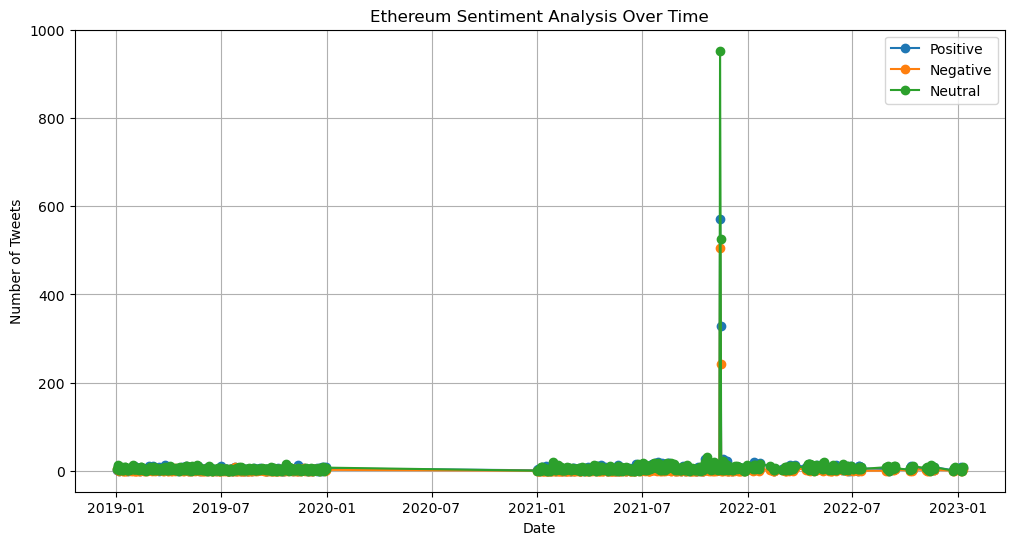

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_sentiment is your DataFrame with 'date' and 'sentiment' columns
# Convert the 'date' column to datetime
# Convert the 'date' column to datetime with the correct format
#df_sentiment['date'] = pd.to_datetime(df_sentiment['date'], format='%Y-%m-%d')

# Group the data by date and sentiment, then count the number of tweets
sentiment_counts = df_sentiment.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Resample the data by day and fill any missing dates
#sentiment_counts = sentiment_counts.resample('D').sum()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(sentiment_counts.index, sentiment_counts['positive'], label='Positive', marker='o')
plt.plot(sentiment_counts.index, sentiment_counts['negative'], label='Negative', marker='o')
plt.plot(sentiment_counts.index, sentiment_counts['neutral'], label='Neutral', marker='o')

plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Analysis Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [88]:
sentiment_counts['positive']

date
2019-01-02     2
2019-01-03    10
2019-01-04     6
2019-01-05     0
2019-01-06     1
              ..
2022-12-27     6
2023-01-06     1
2023-01-07     8
2023-01-08     1
2023-01-09     7
Name: positive, Length: 827, dtype: int64

### Stock price data cleaning

In [ ]:
#import tsla stock price and filter the date
tsla_csv = Path("TSLA.csv")
tsla_df = pd.read_csv(tsla_csv, index_col="Date", parse_dates=True)
tsla_df.sort_index()
tsla_df['Ticker'] = 'TSLA'
tsla_df = tsla_df[['Ticker', 'Close']]
tsla_df.index = pd.to_datetime(tsla_df.index)
start_date = '2019-01-01 00:00:00'
end_date = '2022-12-31 23:59:59'
tsla_df = tsla_df[(tsla_df.index >= start_date) & (tsla_df.index <= end_date)]
tsla_df.head()

In [ ]:
#import amzn stock price and filter the date
amzn_csv = Path("AMZN.csv")
amzn_df = pd.read_csv(amzn_csv, index_col="Date", parse_dates=True)
amzn_df.sort_index()
amzn_df['Ticker'] = 'AMZN'
amzn_df = amzn_df[['Ticker', 'Close']]
amzn_df.index = pd.to_datetime(amzn_df.index)
start_date = '2019-01-01 00:00:00'
end_date = '2022-12-31 23:59:59'
amzn_df = amzn_df[(amzn_df.index >= start_date) & (amzn_df.index <= end_date)]
amzn_df.head()

In [ ]:
#import aapl stock price and filter the date
aapl_csv = Path("AAPL.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Date", parse_dates=True)
aapl_df.sort_index()
aapl_df['Ticker'] = 'AAPL'
aapl_df = aapl_df[['Ticker', 'Close']]
aapl_df.index = pd.to_datetime(aapl_df.index)
start_date = '2019-01-01 00:00:00'
end_date = '2022-12-31 23:59:59'
aapl_df = aapl_df[(aapl_df.index >= start_date) & (aapl_df.index <= end_date)]
aapl_df.head()

In [ ]:
# Import doge prices csv
doge_prices = pd.read_csv('Resources/dogecoin_prices_2021.csv', 
    infer_datetime_format=True, 
    parse_dates=True)

# display dataframe
doge_prices.head()

In [ ]:
#fetching closing prices for Doge
doge_prices = doge_prices[doge_prices['open_time'].str.contains('23:59')]
doge_prices.columns = ['date', 'price']

# display dataframe
doge_prices.head()

In [ ]:
#get rid of links and hashtags
# sample_sentiment_analysis_df["text"] = combined_df["text"].apply(lambda x : ' '.join([s for s in x.split(' ') if s.find('@') == -1 and s.find('www') == -1 and s.find('https') == -1]))

# #get rid of non-ascii characters
# sample_sentiment_analysis_df = sample_sentiment_analysis_df.replace(r'\W+', ' ', regex=True)


# # get rid of tweet duplicates to not bias the sentiment analysis
# sample_sentiment_analysis_df = sample_sentiment_analysis_df.drop_duplicates(subset=['text'])
# sample_sentiment_analysis_df

In [ ]:
# # Tokenize the body text
# import nltk
# from nltk.tokenize import word_tokenize

# nltk.download('punkt')

# # Sample text
# sample_sentiment_analysis_df['tokenized_body'] = sample_sentiment_analysis_df['text'].apply(word_tokenize)

# # Tokenize
# sample_sentiment_analysis_df.sample()

In [ ]:
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')

# def remove_stopwords(tokens):
#     return [word for word in tokens if word.lower() not in stopwords.words('english')]

# sample_sentiment_analysis_df['tokenized_body'] = sample_sentiment_analysis_df['tokenized_body'].apply(remove_stopwords)

# sample_sentiment_analysis_df.sample()